In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm
import numpy as np
#data cleaning
df_tweet = pd.read_csv('data/dailytweets.csv').set_index('Unnamed: 0').rename_axis(None).iloc[::-1]
df_volume = pd.read_csv('data/volumechange.csv').set_index('Unnamed: 0').rename_axis(None)
df_combined = pd.merge(df_volume, df_tweet, left_index=True, right_index=True).dropna()
df_combined.to_csv('tweet_volatility_dataset.csv')

# Question -
#### Is there a correlation between the number of daily tweets sent out by President Donald Trump with increased volatility in equity markets?

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Method

In order to answer the research question, I propose to conduct a correlation analysis on the two variables by using Pearson's Correlation formula to determine a correlation coefficient. 

This method is correct because our dataset consists of two quantitative outcome & explanatory variables. These continous variables can be plotted on a scatter plot and depending on the visualization of the graph and the correlation coefficient we calculate, we can determine whether or not there is a statistically significant relationship between the number of daily tweets sent out by President Donald Trump with volatility in equity markets.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Descriptive Statistics

The goal for our preliminary analysis is to use descriptive statistics to breifly summarize the dataset that I have gathered. In order to examine both measures of variability and correlation, our analysis will use histograms and scatterplots to visualize our data.

In [26]:
#code for outcome variable histogram
def volatility_histogram():
    fig,ax = plt.subplots(figsize=(10,10))
    n,bins,patches = ax.hist(df_volume['volume'].iloc[1:], 40, density=1, facecolor='blue', alpha=0.5, edgecolor='black')
    
    #formatting graph
    ax.set_title('Distribution of Volatility Changes', fontsize=15)
    ax.set_xlabel('% Change in Volatility', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)

#code for explanatory variable histogram
def tweet_histogram():
    fig,ax = plt.subplots(figsize=(10,10))
    n,bins,patches = ax.hist(df_tweet['DailyTweetAmounts'], 40, density=1, facecolor='blue', alpha=0.5, edgecolor='black')
    
    #formatting graph
    ax.set_title('Distribution of Explanatory Variable', fontsize=15)
    ax.set_xlabel('Number of Daily Tweets', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)

#code for scatter plot relationship between variables
def scatter():
    fig,ax = plt.subplots(figsize=(10,10))
    
    #function to calculate gaussian outliers
    def estimate_gaussian(dataset):
        mu = np.mean(dataset) 
        sigma = np.std(dataset)
        limit = sigma * 1.5

        min_threshold = mu - limit
        max_threshold = mu + limit
        return mu, sigma, min_threshold, max_threshold
    #finding outliers 
    mu, sigma, min_threshold, max_threshold = estimate_gaussian(df_combined.iloc[1:].values)
    
    x,y = np.array(df_combined['DailyTweetAmounts']), np.array(df_combined['volume'])
    
    #finding which variables are above/below thresholds and assigning them a color
    outlier_list = []
    for x, y in zip(x, y):
        color = 'blue'  # non-outlier color
        if not min_threshold <= y <= max_threshold:  # condition for being an outlier
            color = 'red'  # outlier color
            outlier_list.append((x,y))
        ax.scatter(x, y, color=color, edgecolor='black')
        
    #formatting graph
    ax.set_title('Market Volatility vs Frequency of Tweets', fontsize=15)
    ax.set_ylabel('% Change in Volume', fontsize=12)
    ax.set_xlabel('Number of Daily Tweets', fontsize=12)
    
    #line of best fit
    new_df = df_combined.reset_index()
    x,y = np.array(new_df['DailyTweetAmounts']), np.array(new_df['volume'])
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='purple', linewidth=3, linestyle='dashed', label='Best Fit')
    
    #creating legends
    red_patch = mpatches.Patch(color='red', label='Outliers')
    blue_patch = mpatches.Patch(color='blue', label='Normal')
    purple_patch = mpatches.Patch(color='purple', label='Line of Best Fit')
    ax.legend(handles=[red_patch, blue_patch, purple_patch])
    print()
    print(f'There are {len(outlier_list)} outliers')
    print()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Volatility Histogram (Outcome Variable)

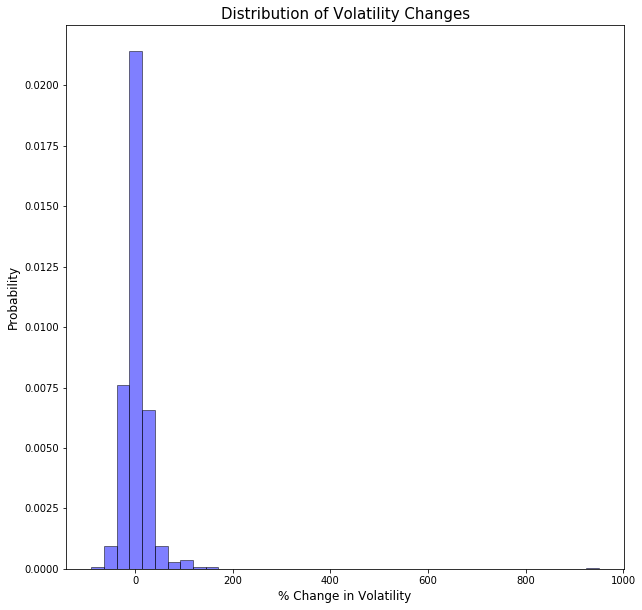

In [27]:
volatility_histogram()

### Outliers
- There is one outlier with a 949% change in volatility. 

### Problematic Responses
- There should be no problematic responses as the data is purely quantitative and are descriptive and unopinionated



-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Tweet Histogram (Explanatory Variable)

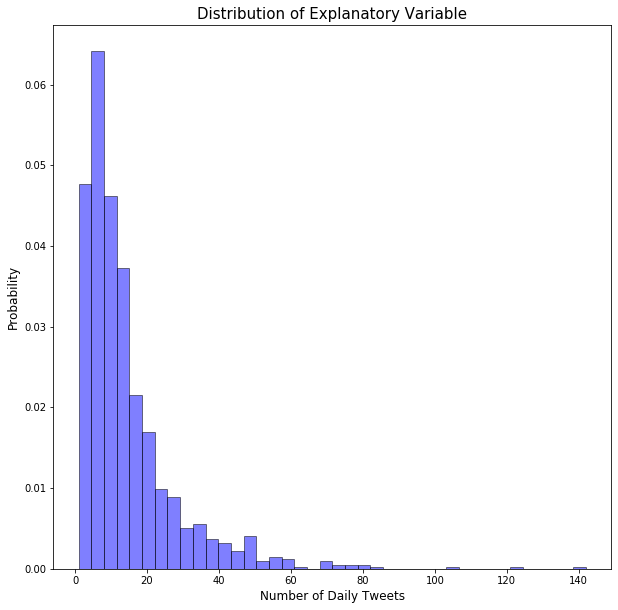

In [28]:
tweet_histogram()

### Outliers
- There are 88 outliers in the explanatory variable data set. I arrived at this number by writing a function that returns a list of variables that are either less than the lower quartile minus the IQR of the dataset or greater than the upper quartile plus the IQR of the dataset. You can find the calculations below along with a box plot that visualizes the outliers.


There are 88 outliers in our dataset, with the minimum outlier as 36 and the max outlier as 142.



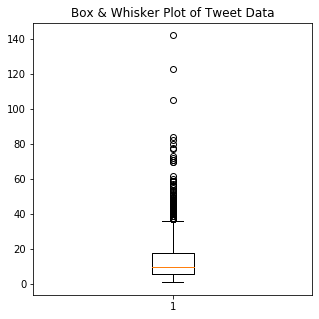

In [29]:
def show_outliers(x, outlierConstant=1.5):
    a = list(x)
    
    #finding quartiles
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    
    #generating parameters
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    outliers = []
    
    #finding outliers
    for num in a: 
        if num <= quartileSet[0] or num >= quartileSet[1]:
            outliers.append(num)
    return outliers
outliers = show_outliers(df_tweet['DailyTweetAmounts'])

print()
print(f'There are {len(outliers)} outliers in our dataset, with the minimum outlier as {min(outliers)} and the max outlier as {max(outliers)}.\n')

#box plot
def box():
    fig,ax = plt.subplots(figsize=(5,5))
    ax.boxplot(df_tweet['DailyTweetAmounts'])
    ax.set_title('Box & Whisker Plot of Tweet Data')
box()

### Problematic Responses
- There should be no problematic responses with the data. Though there is large variability within the data, it is still purely quantitative and are descriptive and unopinionated.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Scatter Plot (Relationship between volatility & frequency of tweets)


There are 30 outliers



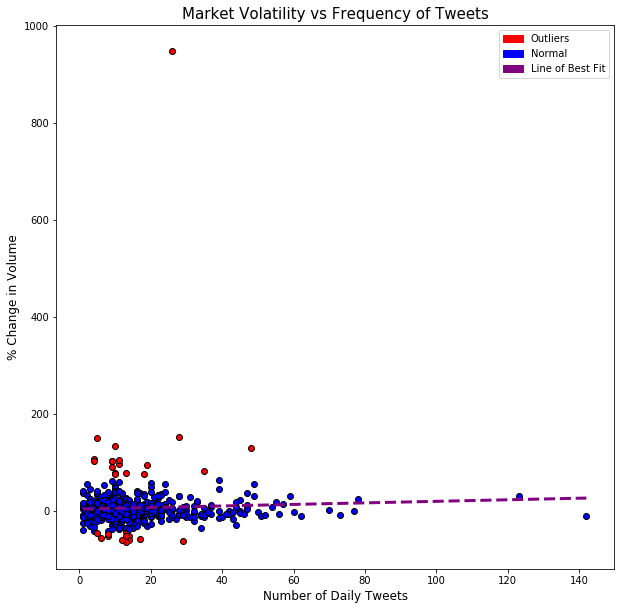

In [30]:
scatter()

### Outliers 
- There are 30 outliers within the scatterplot. We determined this by writing a function that establishes a min & max threshold by subtracting & adding 1.5 times the standard deviation from the mean. Whichever variables that lay outside these thresholds were marked red. 

### Relationship
- Judging from the line of best fit, we can determine there is a very slight positive correlation between market volatilty and the amount of times President Trump tweets per day. 